In [9]:
%store -r X_train X_test y_train y_test

In [10]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
classifier.score(X_train, y_train)*100

98.46153846153847

In [13]:
classifier.score(X_test, y_test)*100

98.24561403508771

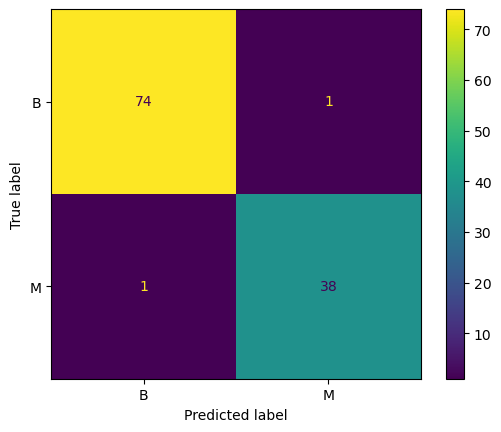

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
display.plot()

In [15]:
accuracy_score(y_test, y_pred)*100

98.24561403508771

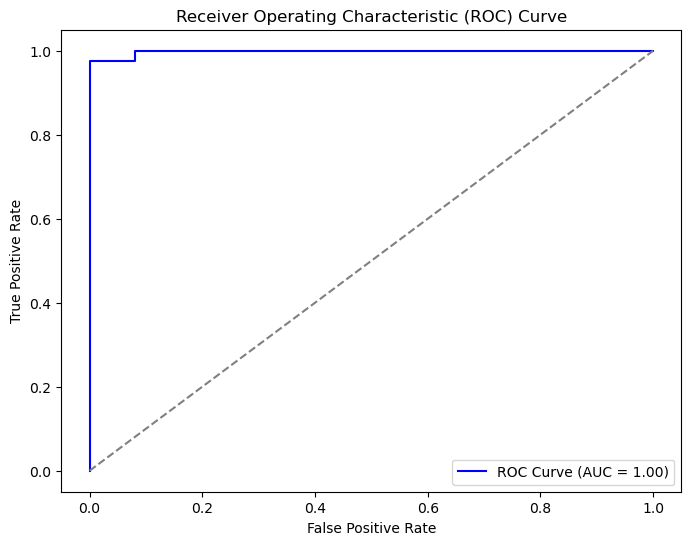

In [16]:
import matplotlib.pyplot as plt
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="M")
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
